<a href="https://colab.research.google.com/github/napoles-uach/FDTD/blob/master/NS_FDTD2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
N    = 300     
T    = 10     
              
Tp   = 50      



sigma = 40.0 

k0 = np.pi/20 

In [3]:
longitud=40e-9
dx=longitud/N
 
m    = 9.1e-31    
hbar = 1.054e-34   
dt   = 0.25*(m/hbar)*dx**2 

c1=1.0/8.0
c2=dt/hbar
lmbda=5*dx

$k_x=\frac{m\pi}{N}$,
$k_y=\frac{m\pi}{N}$,

$k=\sqrt{k_x^2+k_y^2}$

$\gamma = \frac{1}{6}+\frac{k^2}{180}+ \frac{k^4}{7698}$


In [4]:
psi_r = np.zeros((N,N)) 
psi_i = np.zeros((N,N)) 
psi_p = np.zeros((N,N))   
ptot=0.0
mi=3
mj=3
kx=mi*np.pi/N
ky=mj*np.pi/N
kk=np.sqrt(kx**2+ky**2)
gamma=(1/6.)+(kk**2/180.)+(kk**4/7698.)
gamma

0.16667763339993172

In [5]:
1/8.

0.125

In [6]:
for i in range(1,N-1):
    for j in range(1,N-1):
        psi_r[i][j]=np.sin(kx*i)*np.sin(ky*j)
        psi_i[i][j]=0.0
        ptot=ptot+psi_r[i][j]**2+psi_i[i][j]**2        
for i in range(1,N):
    for j in range(1,N):
        psi_r[i][j]=psi_r[i][j]/np.sqrt(ptot)
        psi_i[i][j]=psi_i[i][j]/np.sqrt(ptot)
        ptot1=ptot+psi_r[i][j]**2+psi_i[i][j]**2
        ptot=ptot+psi_r[i][j]**2+psi_i[i][j]**2

In [7]:
dxxyy_r=0.0
dNS_r=0.0
dxxyy_i=0.0
dNS_i=0.0

In [8]:
lambd=2*np.pi/kk
arg=np.pi/(2*lambd)
uns=np.sin( arg**2 )/np.sin( 2*arg )
c1=0.5*uns/np.sin(2*arg)
c1
#c1=1.0/8.0
#c2=2*uns*np.sin(2*arg)/np.abs(energy-V0)
#c2V  = c2*V

0.12502056338821158

In [9]:
for t in range(T+1):
        for i in range(1,N-2):
            for j in range(1,N-2):
                dxxyy_i=psi_i[i+1][j+1]+psi_i[i-1][j+1]-2*psi_i[i][j+1]+\
                        psi_i[i+1][j-1]+psi_i[i-1][j-1]-2*psi_i[i][j-1]\
                       -2*psi_i[i+1][j]-2*psi_i[i-1][j]+4*psi_i[i][j]
                dS_i=psi_i[i+1][j]+psi_i[i-1][j]+psi_i[i][j+1]+psi_i[i][j-1]-4*psi_i[i][j]
                dNS_i=dS_i+gamma*dxxyy_i
                
                dxxyy_r=psi_r[i+1][j+1]+psi_r[i-1][j+1]-2*psi_r[i][j+1]+\
                        psi_r[i+1][j-1]+psi_r[i-1][j-1]-2*psi_r[i][j-1]\
                       -2*psi_r[i+1][j]-2*psi_r[i-1][j]+4*psi_r[i][j]
                dS_r=psi_r[i+1][j]+psi_r[i-1][j]+psi_r[i][j+1]+psi_r[i][j-1]-4*psi_r[i][j]
                dNS_r=dS_r+gamma*dxxyy_r
                
                psi_r[i][j]=psi_r[i][j]-c1*( dNS_i )
                psi_i[i][j]=psi_i[i][j]+c1*( dNS_r )

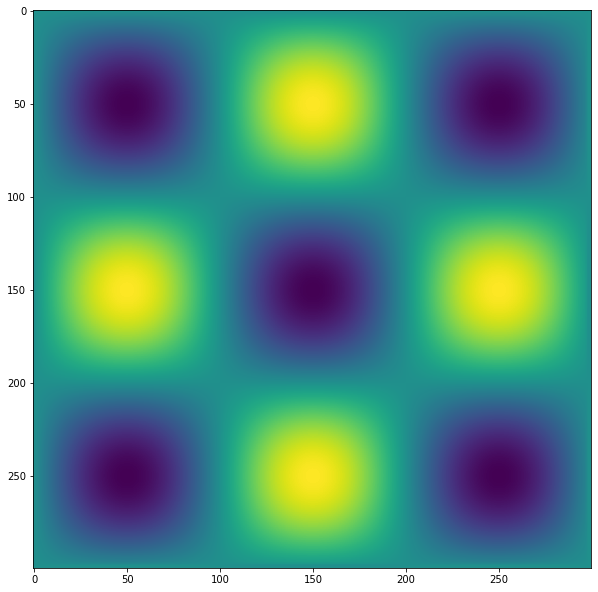

In [10]:
fig = plt.figure(figsize=(10, 20))
plt.imshow(psi_i)